# SUPPORT VECTOR MACHINES

In [1]:
#SVM is a method of classification of classes based on a 
#hyperplane that seperates the support vectors(points in n-dim plane divided 
#by n-1 dim hyperplane) based on their distance form the hyperplane..the 
#objective is to maximize the minimum distance from the hyperplane

In [2]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [3]:
X_data, y_data = make_classification(n_classes=2, n_samples=400, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=3)

In [4]:
# We need top convert y to [-1,1], not [0,1] as we are gonna multiply y[ix] in the loss formula 
# if we use 0 we r gonna loose data

y_data[y_data==0] = -1   ## use of broadcasting in python
print(y_data)

[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1

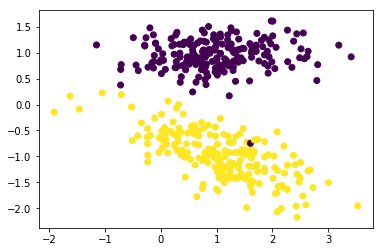

In [5]:
plt.scatter(X_data[:,0], X_data[:,1], c=y_data)

In [6]:
class SVM:
    
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hinge_loss(self,W,b,X_data,y_data):
        
        loss = 0
        loss += 0.5*np.dot(W,W.T)
        
        for ix in range(X_data.shape[0]):
            ti = y_data[ix]*(np.dot(W,X_data[ix].T)+b)
            loss += self.C*max(0,(1-ti))
        
        return loss[0][0]
    
    def fit(self,X_data,y_data,batch_size=100,learning_rate=0.001,maxItr=130):
        
        no_of_features = X_data.shape[1]
        no_of_samples = X_data.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Initialize the model parameters
        
        W = np.zeros((1,no_of_features))
        bias = 0
        
        print(self.hinge_loss(W,bias,X_data,y_data))
        
        #Training of the data
        #weight and bias update rule
        
        losses = []
        
        for ix in range(maxItr):     ## Training loop
            
            l = self.hinge_loss(W,bias,X_data,y_data)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            # Batch gradient descent with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                
                gradw = 0       ## assume zero grad for the batch
                gradb = 0
                
                for jx in range(batch_start,batch_start+batch_size):
                    
                    if jx<no_of_samples:                          ## so the no of batch not exceeeds sample no.
                        idx = ids[jx]
                        ti = y_data[ix]*(np.dot(W,X_data[ix].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                            
                        else:
                            gradw += c*y_data[idx]*X_data[idx]
                            gradb += c*y_data[idx]
                
                ##updation
                
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
            
        self.W = W
        self.b = bias
            
        return W,bias,losses

In [7]:
mySVM = SVM(C = 100)
W,b,losses = mySVM.fit(X_data,y_data)
print(losses)

40000.0
[40000.0, 2837.294090412217, 2840.080823430995, 2842.8578583059884, 2845.625222355004, 2848.382942877763, 2851.1310471552347, 2853.869562448997, 2857.306604821983, 2861.0616367824764, 2865.837904126779, 2870.6000003865884, 2875.344409360676, 2880.0711910689997, 2884.78040537649, 2889.4721119929873, 2894.146370473196, 2898.803240216633, 2903.4427804675984, 2908.0650503151337, 2912.670108692995, 2917.258014379633, 2921.8288259981696, 2926.737717533609, 2932.3115389708946, 2937.864299404551, 2943.3960733789763, 2948.9069352171564, 2954.55452083006, 2961.061592217692, 2967.5438280881176, 2974.001318436717, 4001.192860897957, 3992.0545432295735, 3983.0093522113593, 3975.072561327606, 3967.1726971698217, 3959.3095705813726, 3951.482993493319, 3943.6927789174288, 3935.9387409392284, 3928.220694711113, 3920.538456445494, 3912.891843408005, 3905.2806739107496, 3897.704767305597, 3890.163943977526, 3882.6580253380116, 3875.1868338184668, 3867.750192863718, 3860.712085094791, 3854.4608862

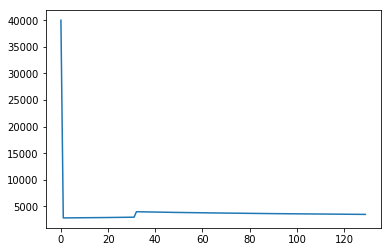

In [8]:
plt.plot(losses)
plt.show()

In [9]:
ids = np.arange(100)
np.random.shuffle(ids)
print(ids)

[98 56 43 75 20 14 67 77 10 36 54 89 72 74 32 53 86 81 39 22  8 27 70 44
 51 18  5 58 38 48  3 79 28 76 47 41 30 94 90 46 16 55 68  9 62  4 87 17
 88 35 82 49 80 65 31 63 95 99 84 29 25 13 92 26  2 71 85 37 21 78 64 52
 42 66 12 93  6 23 24 97 69 96 57 83 60 40 15  0 50 19 91  7 45 73  1 61
 59 34 11 33]


In [10]:
W,b = mySVM.W,mySVM.b
print(W, b)

[[ -0.54894632 -12.35225311]] -1.8


In [11]:
def plot_hyperplane(w1,w2,b):
    
    plt.figure(figsize=(12,12))
    x1 = np.linspace(-2,4,10)
    x2 = -(w1*x1+b)/w2     ## WT + B = 0
    
    plt.plot(x1,x2)
    
    plt.scatter(X_data[:,0], X_data[:,1], c=y_data)
    plt.show()
    

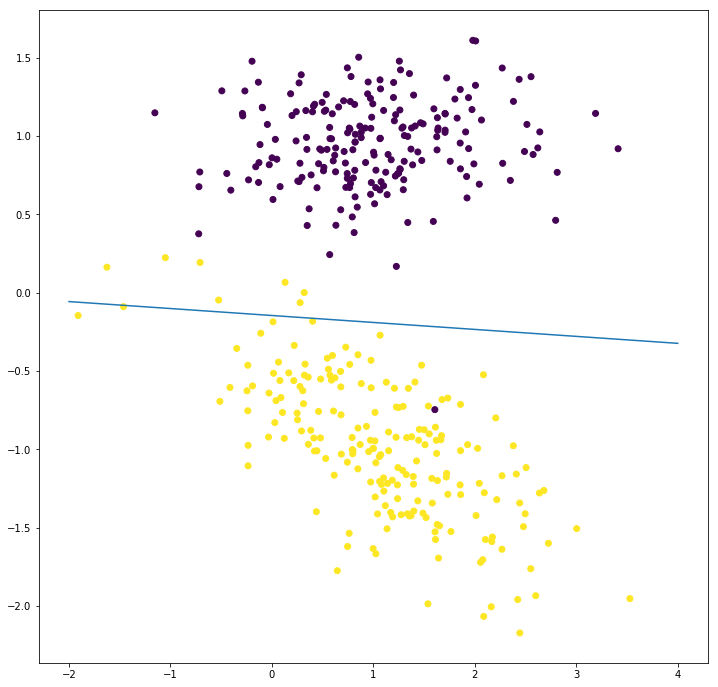

In [12]:
plot_hyperplane(W[0][0],W[0][1],b)

# Visualizing SVM and -ve, +ve Hyperplanes

In [13]:
def plot_hyperplane(w1,w2,b):
    
    plt.figure(figsize=(12,12))
    x1 = np.linspace(-2,4,10)
    x2 = -(w1*x1+b)/w2     ## WT + B = 0
    
    xp = -(w1*x1+b+1)/w2     ## WT + B = -1
    xn = -(w1*x1+b-1)/w2     ## WT + B = +1
    
    plt.plot(x1,x2,label="Hyperplane : WT + B = 0")
    plt.plot(x1,xp,label="+ve Hyperplane : WT + B = -1")
    plt.plot(x1,xn,label="-ve Hyperplane : WT + B = +1")
    plt.legend()
    plt.scatter(X_data[:,0], X_data[:,1], c=y_data)
    plt.show()

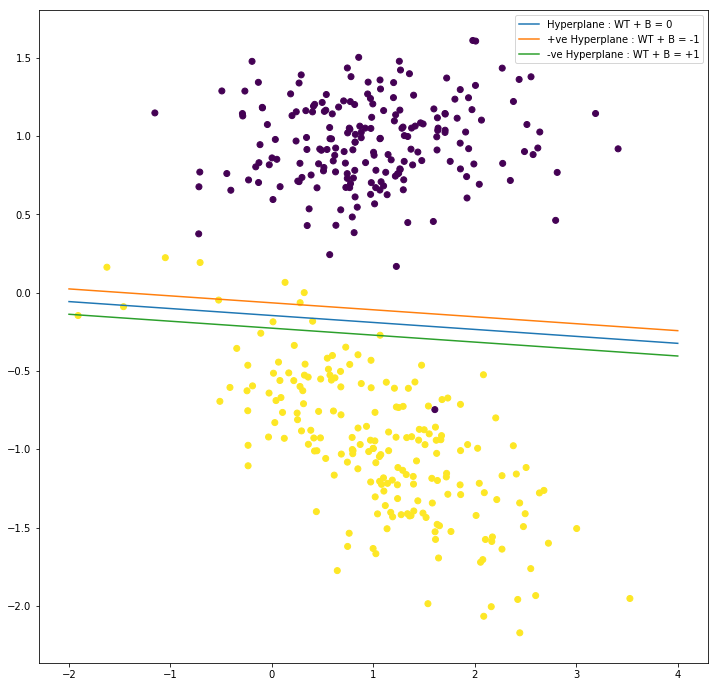

In [14]:
plot_hyperplane(W[0][0],W[0][1],b)

In [15]:
### changing the value of C(penalty constant) changes the maxItr and the width or Er of the SVM...
## lesser vector points come under the margin, ie margin is reduced when C is increased.

# Handling Non-Linear Seperable Data

In [16]:
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D

In [17]:
X_data,y_data = make_circles(n_samples=500,noise=0.05)

print(X_data.shape, y_data.shape)

(500, 2) (500,)


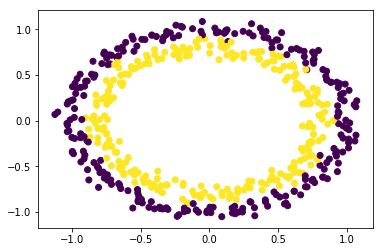

In [18]:
plt.scatter(X_data[:,0],X_data[:,1],c=y_data)

In [19]:
## Projecting data into higher dimensions helps in better classification
## eg: we have two features x1,x2 we introduce a third one x3 that is fuction of x1 & x2 like x1^2+x2^2..etc
## on the basis of x3 we can introduce a new dimension that seperates both datasets by a hyperplane.

In [20]:
## define a func phi..that takes the original features and make a new one by some non-linear trnaformation
def phi(X_data):
    
    X1_data = X_data[:,0]
    X2_data = X_data[:,1]
    X3_data = X1_data**2 + X2_data**2
    
    X_new = np.zeros((X_data.shape[0],3))
    print(X_new.shape)
    
    X_new[:,:-1] = X_data
    X_new[:,-1] = X3_data
    
    return X_new

In [21]:
X_new = phi(X_data)  ## changing the data to higher dim...

(500, 3)


In [22]:
## plotting the 3d plot of the new data
def plot3d(X, show=True):
    
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111,projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=y_data,depthshade=True)
    
    if show==True:
        plt.show()
    
    return ax

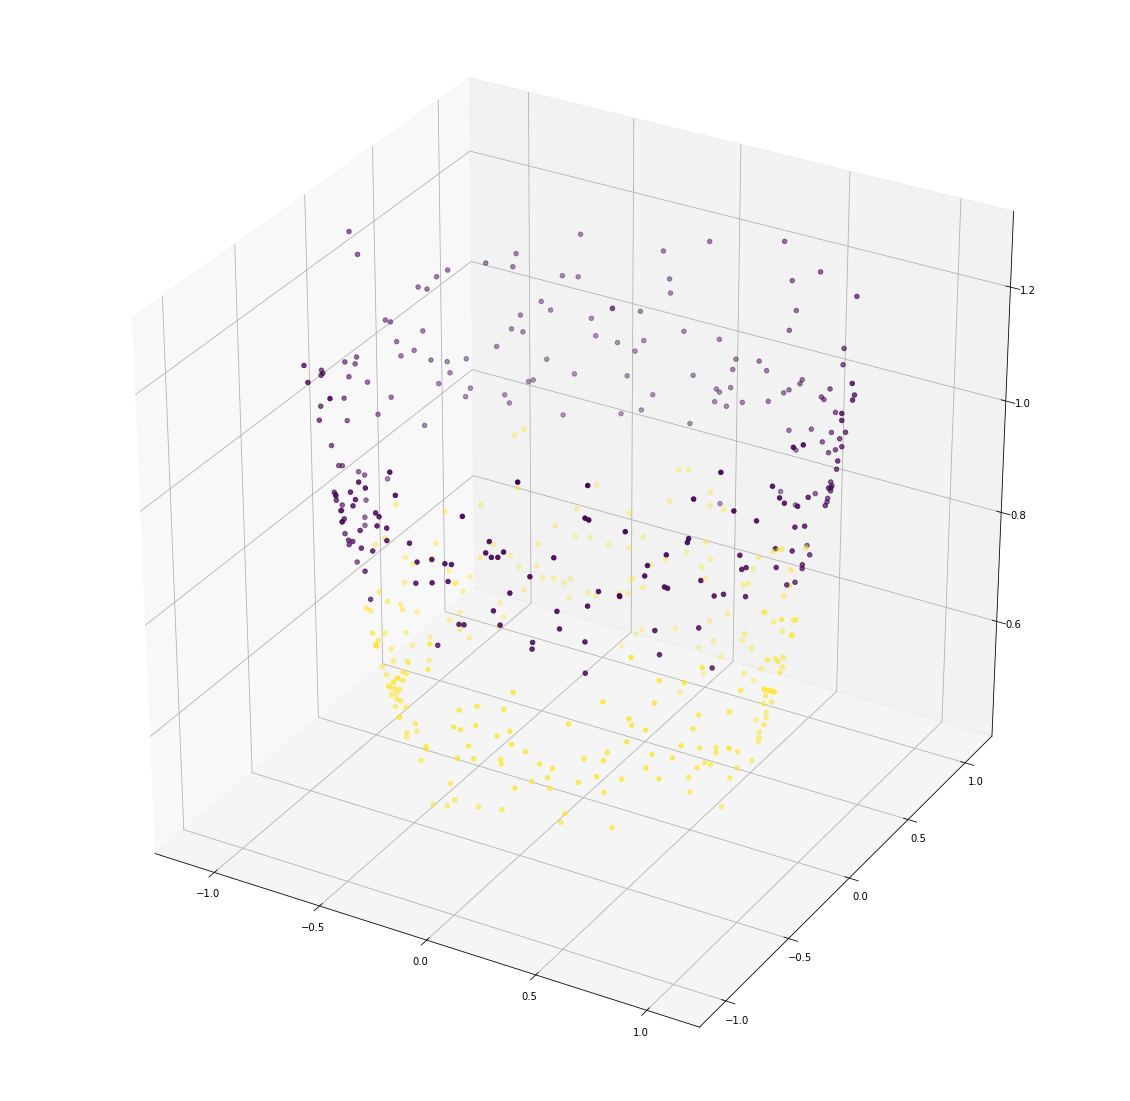

In [23]:
ax = plot3d(X_new)

In [24]:
## Clearly its easier to seperate in this by using a plane that is prerpendicular to z axis here, rather than in 2d

In [25]:
## USING A LOGISTIC CLASSIFIER TO CLASSIFY THIS DATA

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [27]:
Lr = LogisticRegression()

In [28]:
acc = cross_val_score(Lr,X_data,y_data,cv=5).mean()    ## 5-fold cross val
print("accuracy on X_data(2D), %4f" %(acc*100) )

accuracy on X_data(2D), 45.400000


/home/vinayak/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vinayak/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vinayak/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vinayak/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vinayak/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

In [29]:
## Clearly 2D gives really bad accuracy 45%

In [30]:
acc = cross_val_score(Lr,X_new,y_data,cv=5).mean()    ## 5-fold cross val
print("accuracy on X_data(3D), %4f" %(acc*100) )

accuracy on X_data(3D), 98.000000


/home/vinayak/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vinayak/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vinayak/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vinayak/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vinayak/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

In [31]:
## getting 97% accuracy on 3D dataste

# Visualize The Decision Surface

In [32]:
Lr.fit(X_new,y_data)

/home/vinayak/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
wts = Lr.coef_
print(wts)

[[-0.02096495  0.03412425 -8.27671819]]


In [34]:
bias = Lr.intercept_

In [35]:
X_, y_ = np.meshgrid(range(-2,2),range(-2,2))
print(X_)
print(y_)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [36]:
z = -(wts[0,0]*X_ + wts[0,1]*y_ + bias)/wts[0,2]
print(z)

[[0.81045756 0.80792456 0.80539155 0.80285855]
 [0.81458048 0.81204748 0.80951447 0.80698147]
 [0.8187034  0.8161704  0.81363739 0.81110439]
 [0.82282632 0.82029332 0.81776031 0.81522731]]


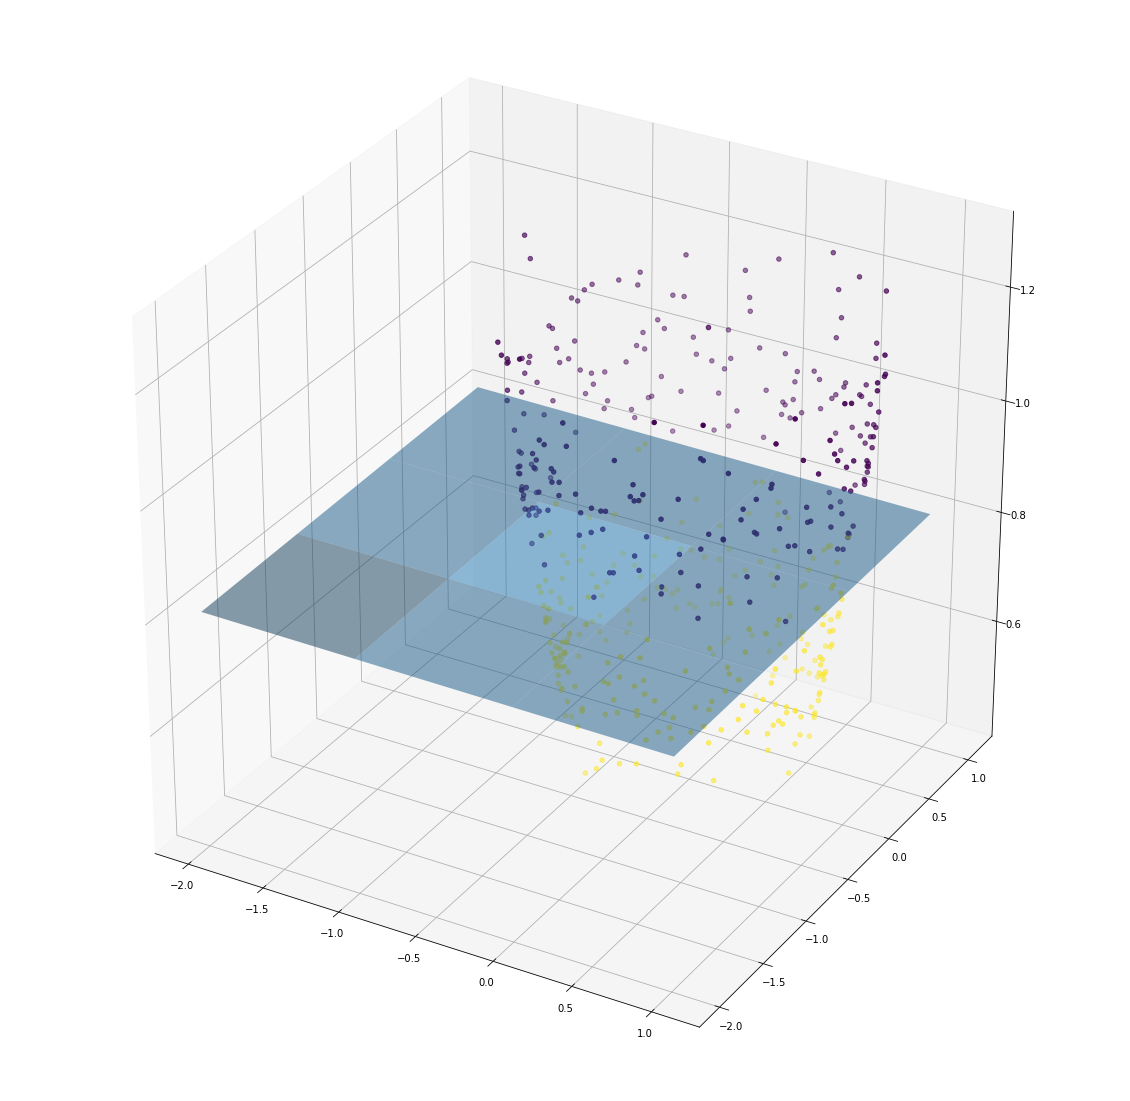

In [37]:
ax = plot3d(X_new, False)
ax.plot_surface(X_,y_,z,alpha=0.5)        ##alpha 4 transparency

plt.show()